# **Preparação do Ambiente**

**Instalação de Pacotes**

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
!pip install googletrans==3.0.0

     |████████████████████████████████| 61kB 3.5MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 983kB 7.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 102kB 6.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=461973bd32218babd3dd62e658af28cf22843bde0b043a59b31a457b09627407
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6d2f8a00291a2d437c908ef58ff26b1cf48d8251bbad30ea570ed6f29a72b905
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.3MB/s 
     |████████████████████████████████| 6.5MB 16.2MB/s 
     |████████████████████████████████| 14.8MB 313kB/s 


**Imports**

In [ ]:
from textblob import TextBlob
from random import randrange
from google.colab import files
import io
import pandas as pd
import time
from googletrans import Translator
from datetime import datetime
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopandas
import matplotlib.pyplot as plt

# **2.2 - Base de Dados**


Esta base de dados contém 100.000 comentários coletados do site TripAdvisor. Cada linha do arquivo contém um comentário e outros dados.



> # 2.2.1 Base de Dados (*Body Review* em português)



In [ ]:
portuguese_dataset = pd.read_json("http://tiagodemelo.info/datasets/dataset-v2.dat",lines=True)

In [ ]:
TAM_DATASET = len(portuguese_dataset)

> # 2.2.2 Base de Dados (*Body Review* em inglês)



In [ ]:
dataset_traduzido = dataset.iloc[0:TAM_DATASET,:]
numero_aleatorio = 0;
i = 0
lista = []
while (i<TAM_DATASET):
  qtdeCaracteres = 0
  textoReviews = ""
  while (qtdeCaracteres < 200000):
    reviewText = str(dataset['reviewBody'][i])
    texto_data_set_sem_enter = reviewText.replace("\n"," ")
    textoReviews = textoReviews +  texto_data_set_sem_enter + "\n"
    qtdeCaracteres = qtdeCaracteres + len(textoReviews)
    i = i + 1

  comentario_blob = TextBlob(textoReviews)  
    
  try:
    comentario_blob_us = str(comentario_blob.translate(to='us'))
  except:
    comentario_blob_us = str(comentario_blob)
    print("Erro na linha: ",i)
  
  numero_aleatorio = randrange(1,4)  
  time.sleep(numero_aleatorio)
  
  lista.extend(comentario_blob_us.split("\n"))

print("Tamanho lista: ", len(lista))

for i in range(len(dataset_traduzido)):
  dataset_traduzido['reviewBody'][i] = lista[i]

arquivo = open("english_dataset.csv", "a")
dataset_traduzido.to_csv("english_dataset.csv")
arquivo.close()
files.download('english_dataset.csv')

In [ ]:
uploaded_english_dataset = files.upload()

Saving english_dataset.csv to english_dataset.csv


In [ ]:
english_dataset = pd.read_csv(io.BytesIO(uploaded_english_dataset['english_dataset.csv']))

# **2.3 - Visão Geral dos Dados**

In [ ]:
portuguese_dataset.head()

,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed,estado,CEP
0,Jantar,692856288,2344932.0,larinhavercosa222,"Comida maravilhosa, lugar do verdadeiro chicle...",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,"{'name': 'Imperador dos Camarões', 'address': ...",Alagoas,57030-170
1,Uma boa experiência.,229208487,3720906.0,Pano P,"Comida boa, drinks legais e um ambiente bem ac...",pt,True,"Manaus, AM",16/09/2014,None,4,"{'name': 'Guacamole Natal', 'address': {'stree...",Rio Grande do Norte,59092-100
2,Otimo self service,679002332,2248105.0,Magma100,"Excelente pra ir com a família! Ótima Comida, ...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,"{'name': 'Chica Pitanga', 'address': {'streetA...",Pernambuco,51021-250
3,O sorvete mais tradicional do estado,355671519,8168302.0,Yurie M,Tomo sorvete na Visabor faz mais de 30 anos. S...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,"{'name': 'Sorvetes Vi Sabor', 'address': {'str...",Sergipe,
4,Melhor hamburger!,268741921,5395141.0,Debora_C85,O melhor hamburger que já comi! Excelente aten...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,"{'name': 'Z Deli Sandwich Shop', 'address': {'...",Estado de São Paulo,01414-002


In [ ]:
english_dataset.head()

,Unnamed: 0,title,reviewId,restaurantId,author,reviewBody,language,mobileDevice,userLocation,publicationDate,visitDate,ratingValue,itemReviewed
0,0,Jantar,692856288,2344932.0,larinhavercosa222,"Wonderful food, the place for real shrimp gum....",pt,True,"São Carlos, SP",26/07/2019,07/2019,5,"{'name': 'Imperador dos Camarões', 'address': ..."
1,1,Uma boa experiência.,229208487,3720906.0,Pano P,"Good food, nice drinks and a very cozy atmosph...",pt,True,"Manaus, AM",16/09/2014,None,4,"{'name': 'Guacamole Natal', 'address': {'stree..."
2,2,Otimo self service,679002332,2248105.0,Magma100,"Excellent to go with the family! Great food, p...",pt,True,"Goiânia, GO",04/06/2019,07/2018,4,"{'name': 'Chica Pitanga', 'address': {'streetA..."
3,3,O sorvete mais tradicional do estado,355671519,8168302.0,Yurie M,I have had ice cream at Visabor for over 30 ye...,pt,False,"Aracaju, SE",15/03/2016,01/2016,5,"{'name': 'Sorvetes Vi Sabor', 'address': {'str..."
4,4,Melhor hamburger!,268741921,5395141.0,Debora_C85,The best hamburger I've ever eaten! Excellent ...,pt,False,"Rio de Janeiro, RJ",28/04/2015,04/2015,5,"{'name': 'Z Deli Sandwich Shop', 'address': {'..."


In [ ]:
def series(dataset):
  total_de_coments = TAM_DATASET
  listaDeQtdeDeSentencaPorComentario = []
  listaDeQtdeDePalavrasPorComentario = []
  for i in range(total_de_coments):
    try:
      textoReview = dataset['reviewBody'][i]
      comentario_blob = TextBlob(textoReview)
      qtde_sentencas_coment = len(comentario_blob.sentences)
      qtde_palavras_coment = len(comentario_blob.words)
      listaDeQtdeDeSentencaPorComentario.append(qtde_sentencas_coment)
      listaDeQtdeDePalavrasPorComentario.append(qtde_palavras_coment)
    except:
      print('Erro ao ler NaN na linha: ',i)

  serieQtdeSentencasPorComentario = pd.Series(listaDeQtdeDeSentencaPorComentario)
  serieQtdePalavrasPorComentario = pd.Series(listaDeQtdeDePalavrasPorComentario)

  return serieQtdeSentencasPorComentario, serieQtdePalavrasPorComentario


In [ ]:
series_portuguese = series(portuguese_dataset)
series_english = series(english_dataset)

Erro ao ler NaN na linha:  8528
Erro ao ler NaN na linha:  8528


In [ ]:
estatisticas = {'Idioma':['Português','Inglês'], 'Qtde de comentários': [series_portuguese[0].count(), series_english[0].count() ], 
        'Qtde de sentenças':[sum(series_portuguese[0]), sum(series_english[0])], 
        'Nro. Médio de Sentenças por comentários': [series_portuguese[0].mean(), series_english[0].mean()],
        'Nro. Médio de palavras por comentários':[series_portuguese[1].mean(), series_english[1].mean()], 
        'Nro. Máximo de sentenças em comentário':[series_portuguese[0].max(), series_english[0].max()],
        'Nro. Mínimo de sentenças em comentário':[series_portuguese[0].min(), series_english[0].min()] } 

In [ ]:
pd.DataFrame(estatisticas)

,Idioma,Qtde de comentários,Qtde de sentenças,Nro. Médio de Sentenças por comentários,Nro. Médio de palavras por comentários,Nro. Máximo de sentenças em comentário,Nro. Mínimo de sentenças em comentário
0,Português,99999,362729,3.627326,42.209432,56,1
1,Inglês,99999,371738,3.717417,44.295983,57,1


In [ ]:
portuguese_dataset['ratingValue'].value_counts()

5    51169
4    32390
3    10349
2     3175
1     2917
Name: ratingValue, dtype: int64

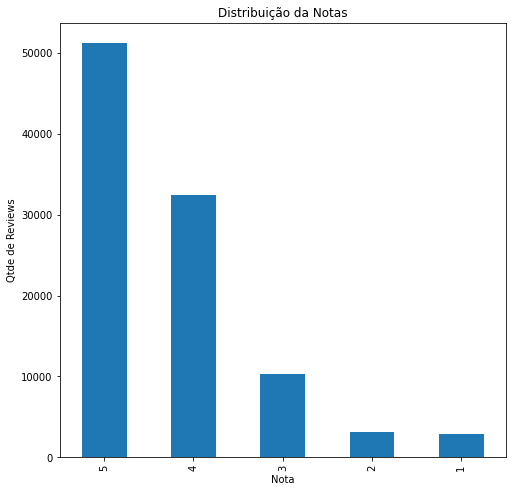

In [ ]:
portuguese_dataset['ratingValue'].value_counts().plot(kind='bar', title='Distribuição da Notas', xlabel='Nota',ylabel='Qtde de Reviews')

In [ ]:
portuguese_dataset['mobileDevice'].value_counts()

False    57599
True     42401
Name: mobileDevice, dtype: int64

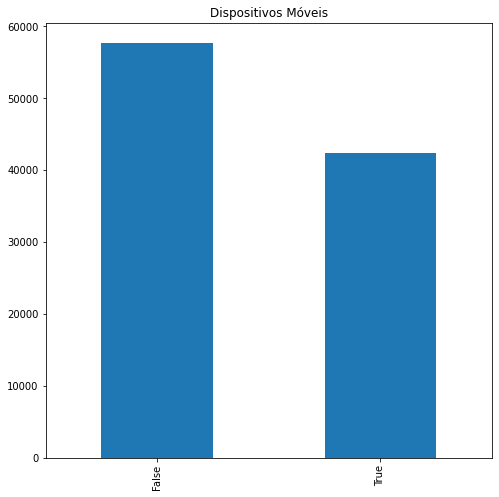

In [ ]:
portuguese_dataset['mobileDevice'].value_counts().plot(kind='bar', title='Dispositivos Móveis')

In [ ]:
portuguese_dataset['userLocation'].value_counts()[:5].sort_values(ascending=False)

São Paulo, SP         14707
Rio de Janeiro, RJ     8266
Brasília, DF           5407
Belo Horizonte, MG     4663
Porto Alegre, RS       3783
Name: userLocation, dtype: int64

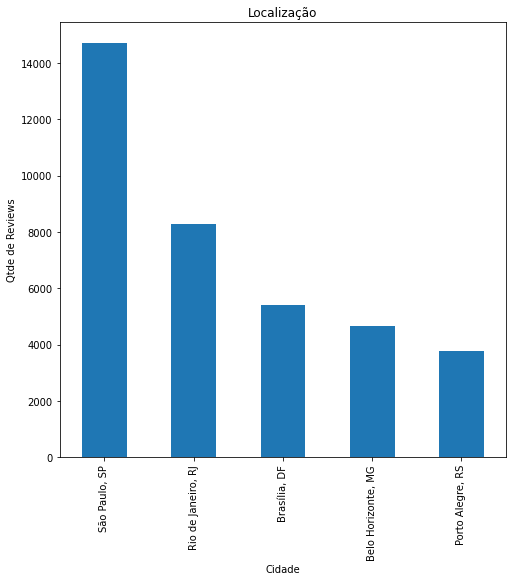

In [ ]:
portuguese_dataset['userLocation'].value_counts()[:5].sort_values(ascending=False).plot(kind='bar', title='Localização', xlabel='Cidade',ylabel='Qtde de Reviews')

# **2.4 - Análise de Sentimento**


> A análise de sentimentos pode ser vista como uma tarefa de processamento de linguagem natural (PNL) que visa analisar opiniões, sentimentos e emoções expressas em dados não estruturados





> # **2.4.1 Etapa I (Em relação a todo o dataset)**


> Mostrar a distribuição de sentenças factuais e subjetivas, assim como a distribuição de comentários positivos, negativos e neutros.



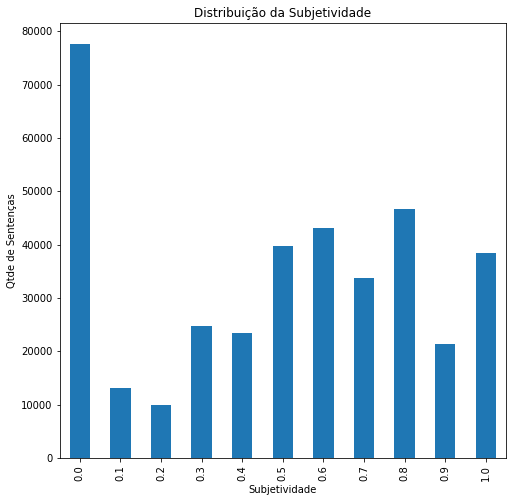

In [ ]:

subjetividade = {'Sentenca':[],'Subjetividade':[]}
listaSentenca = []
listaSubjetividade = []

for i in range(len(english_dataset)):
  comentario_blob = TextBlob(str(english_dataset['reviewBody'][i]))

  for sentence in comentario_blob.sentences:
    listaSentenca.append(str(sentence))
    listaSubjetividade.append(round(sentence.sentiment.subjectivity,1))

subjetividade.update({'Sentenca': listaSentenca})
subjetividade.update({'Subjetividade': listaSubjetividade})

dataFrame = pd.DataFrame(subjetividade)
dataFrame.groupby('Subjetividade').Subjetividade.count().plot(kind="bar", title='Distribuição da Subjetividade', xlabel='Subjetividade',ylabel='Qtde de Sentenças')

**Dada a distribuição acima, resolvemos adotar que a partir de 0.3 é uma senteça é considerada subjetiva e menor que 0.3 é factual.**

In [ ]:
dataFrame.loc[dataFrame['Subjetividade'] >= 0.3, 'Subjetividade'] = 1

In [ ]:
dataFrame.loc[dataFrame['Subjetividade'] < 0.3, 'Subjetividade'] = 0

In [ ]:
dataFrame

,Sentenca,Subjetividade
0,"Wonderful food, the place for real shrimp gum.",1.0
1,"The waiter Éric Lima served us very well, we i...",1.0
2,"Good food, nice drinks and a very cozy atmosph...",1.0
3,We tried many things and everything pleased us.,1.0
4,Especially a duck served in one of the house d...,1.0
...,...,...
371734,"Very expensive, right?",1.0
371735,"The lettuce was withered, no seasoning options...",1.0
371736,Aff.,0.0
371737,"Thanks, neither for the environment nor for th...",0.0


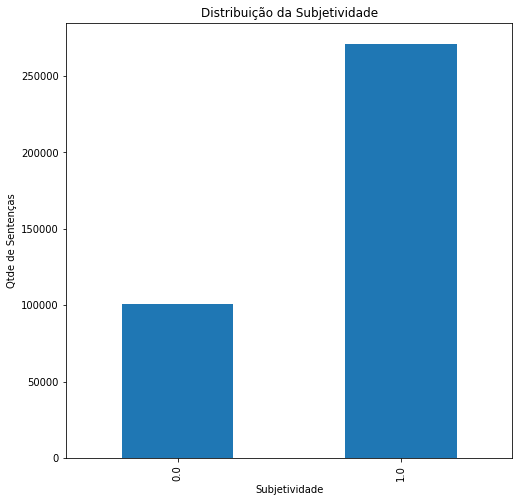

In [ ]:
dataFrame.groupby('Subjetividade').Subjetividade.count().plot(kind="bar", title='Distribuição da Subjetividade', xlabel='Subjetividade',ylabel='Qtde de Sentenças')

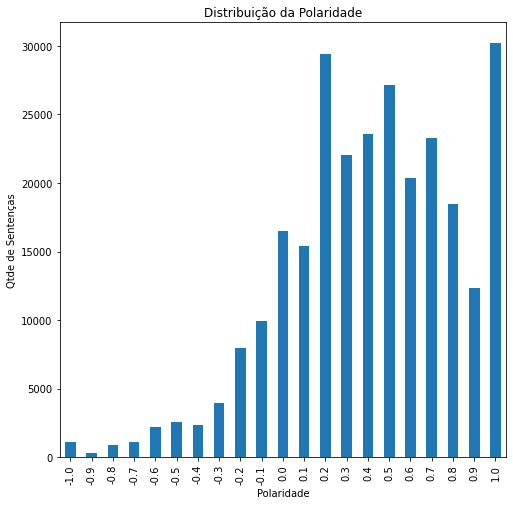

In [ ]:
lista_polaridade = []
polaridade = {"Sentenca":[],"Polaridade":[]}

listaSentencasSubjetivas = list(dataFrame.loc[dataFrame['Subjetividade'] == 1, 'Sentenca'])

for sentencaSubjetiva in listaSentencasSubjetivas:
  comentario_blob = TextBlob(sentencaSubjetiva)
  lista_polaridade.append(round(comentario_blob.sentiment.polarity,1))

polaridade.update({'Sentenca': listaSentencasSubjetivas})
polaridade.update({'Polaridade': lista_polaridade})

dataFramePolaridade = pd.DataFrame(polaridade)
dataFramePolaridade.groupby('Polaridade').Polaridade.count().plot(kind="bar", title='Distribuição da Polaridade', xlabel='Polaridade',ylabel='Qtde de Sentenças')


In [ ]:
dataFramePolaridade.loc[dataFramePolaridade['Polaridade'] < 0, 'Polaridade'] = -1

In [ ]:
dataFramePolaridade.loc[dataFramePolaridade['Polaridade'] > 0, 'Polaridade'] = 1

In [ ]:
dataFramePolaridade.groupby('Polaridade').Polaridade.count()

Polaridade
-1.0     32479
 0.0     16515
 1.0    222158
Name: Polaridade, dtype: int64

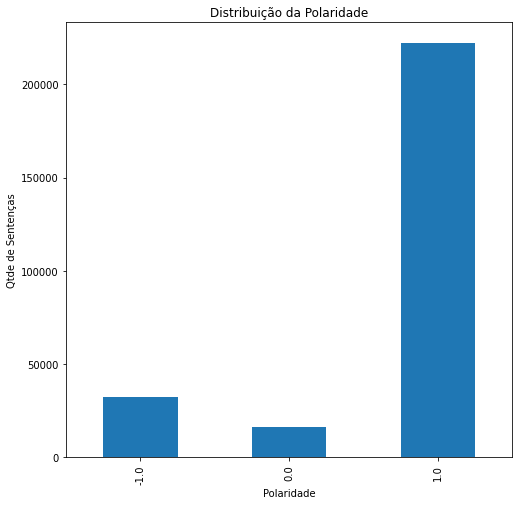

In [ ]:
dataFramePolaridade.groupby('Polaridade').Polaridade.count().plot(kind="bar", title='Distribuição da Polaridade', xlabel='Polaridade',ylabel='Qtde de Sentenças')

> # **2.4.2 Etapa II  - (Em relação a 200 sentenças sorteadas aleatoriamente)**


In [ ]:
def lista_sentencas_sorteadas():
  indices_sentencas_sorteadas  = [168929, 22553, 142868, 172447, 241519, 241090, 103058,
               148056, 161765, 300125, 69477, 43592, 104928, 359608, 182455,
               59715, 56436, 37128, 115125, 45107, 27092, 359822, 257751, 63098,
               261522, 96224, 125213, 87472, 33467, 337509, 24407, 142779,
               295674, 183152, 225627, 360073, 3494, 188423,
               357804, 267693, 231728, 145633, 116408, 22365, 108572, 114527, 156790,
               72881, 350031, 326486, 220802, 55784, 355324, 310755, 285849,
               197272, 304848, 68014, 31498, 102997, 207435, 292551, 7415, 290528,
               355669, 9856, 297, 299389, 229078, 334077, 297263, 158423, 5614,
               89082, 20891, 317626, 200094, 318231, 83623, 46266, 191368, 48695,
               246578, 179431, 15655, 44779, 124211, 245469, 323665, 331011, 12968, 96822,
               195556, 332764, 276229, 36084, 351534, 246306, 32865, 177998, 48710,
               95498, 158997, 103958, 112762, 221178, 206511, 254632, 68538, 285410,
               213653, 70343, 54238, 159437, 244952, 235127, 296631, 327114, 291679,
               178911, 247358, 331324, 9513, 267788, 54746, 259076, 234020, 177799, 270617,
               241760, 355358, 145502, 81979, 89775, 352321, 165296, 290842, 357345,
               119901, 89852, 218543, 144726, 84673, 196752, 153368, 204677, 249529, 318715,
               335741, 62435, 67481, 108227, 34526, 158623, 165651, 206831, 159201, 66949, 205676,
               294214, 99787, 158646, 325936, 250335, 243971, 140370, 74341, 114910, 287418,
               98280, 121855, 200461, 68162, 165735, 194062, 215419, 67714, 3110, 32318,
               251687, 318449, 303161, 196500, 231872, 216529, 349820, 359205, 310871, 353845, 74400,
               57131, 248919, 295382, 160973, 278104, 218077, 181430, 240509, 245599, 344916]

  lista_de_sentencas = []
  lista_de_sentencas_sorteadas = []
  for i in range(TAM_DATASET):
    try:
      textoReview = portuguese_dataset['reviewBody'][i]
      comentario_blob = TextBlob(textoReview)
      for sentence_br in comentario_blob.sentences:
        lista_de_sentencas.append(sentence_br)
    except:
      1 + 1 
  for j in range(len(indices_sentencas_sorteadas)):
    texto = str(lista_de_sentencas[indices_sentencas_sorteadas[j]])
    texto_sem_enter = texto.replace("\n"," ")
    lista_de_sentencas_sorteadas.append(texto_sem_enter)

  return lista_de_sentencas_sorteadas

In [ ]:
def traduzir_textBlob(lista):
  translations = []
  for sentenca in lista:
    texto_blob = TextBlob(sentenca)
    
    try:
      texto_traduzido_blob = texto_blob.translate(to='us')
    except:
      texto_traduzido_blob = texto_blob
      print("Erro ao traduzir: ",sentenca)

    texto_traduzido = str(texto_traduzido_blob)

    translations.append(texto_traduzido)
    numero_aleatorio = randrange(1,4)  
    time.sleep(numero_aleatorio)

  return translations

In [ ]:
def traduzir_googleTrans(lista):
  translated_list = []
  translator = Translator()
  translations = translator.translate(lista)
  for translation in translations:
    translated_list.append(translation.text)
  return translated_list

In [ ]:
def gerar_arquivo_reposta_metodo_textBlob(tradutor, lista_de_sentencas_sorteadas, nome_arquivo):
  lista_sentenca_traduzida = []
  lista_subjetividade = []
  lista_polaridade = []
  reposta_metodo = {'Sentenca':[], 'Subjetividade':[], 'Polaridade':[]}

  lista_traduzida = tradutor(lista_de_sentencas_sorteadas)

  for sentenca_traduzida in lista_traduzida:
    
    sentence_english =  TextBlob(sentenca_traduzida)

    lista_sentenca_traduzida.append(str(sentence_english))

    if (round(sentence_english.sentiment.subjectivity,1)) >= 0.3:
      lista_subjetividade.append(1)
    else:
      lista_subjetividade.append(0)  

    if (round(sentence_english.sentiment.polarity,1)) == 0:
      lista_polaridade.append(0)
    elif (round(sentence_english.sentiment.polarity,1)) > 0:
      lista_polaridade.append(1)
    else:
      lista_polaridade.append(-1)  
    
  reposta_metodo.update({'Sentenca': lista_sentenca_traduzida})
  reposta_metodo.update({'Subjetividade': lista_subjetividade})
  reposta_metodo.update({'Polaridade': lista_polaridade})

  df = pd.DataFrame(reposta_metodo)

  arquivo = open(nome_arquivo, "a")
  df.to_csv(nome_arquivo)
  arquivo.close()
  files.download(nome_arquivo)


In [ ]:
uploadedGabarito = files.upload()

Saving avaliacoes.xlsx to avaliacoes.xlsx


In [ ]:
gabarito = pd.read_excel(io.BytesIO(uploadedGabarito['avaliacoes.xlsx']))

In [ ]:
lista_sorteadas = lista_sentencas_sorteadas()

In [ ]:
gerar_arquivo_reposta_metodo_textBlob(traduzir_textBlob,lista_sorteadas,"resposta-metodo-textblob.csv")

In [ ]:
uploadedRespostaMetodo = files.upload()

Saving resposta-metodo-textblob.csv to resposta-metodo-textblob.csv


In [ ]:
resposta_metodo = pd.read_csv(io.BytesIO(uploadedRespostaMetodo['resposta-metodo-textblob.csv']))

> # **2.4.2.1 Resultados**



Precisão/Revocação/Medida-F para Método de Identificação **da Subjetividade de Sentenças** do TextBlob

In [ ]:
def imprimir_metricas_subjetividade(subjetividade):
  numerador = 0
  for k in range(len(resposta_metodo)):
    if resposta_metodo['Subjetividade'][k] == subjetividade:
      if resposta_metodo['Subjetividade'][k] == gabarito['Subjetividade'][k]:
        numerador = numerador + 1

  denominador_precisao = len(resposta_metodo.loc[resposta_metodo.Subjetividade == subjetividade])

  denominador_revocacao = len(gabarito.loc[gabarito.Subjetividade == subjetividade])

  try:
    precisao = numerador/denominador_precisao
    print("Precisão (",numerador,"/",denominador_precisao,") = " ,precisao)
  except ZeroDivisionError:
    print("Erro: Divisão por zero. Não foi possível calcular precisão")  

  try:
    revocacao = numerador/denominador_revocacao
    print("Revocação (",numerador,"/",denominador_revocacao,") = " ,revocacao)
  except ZeroDivisionError:
    print("Erro: Divisão por zero. Não foi possível calcular revocação")  

  try:
    medida_f = (2*precisao*revocacao)/(precisao+revocacao)
    print("Medida-F = ", medida_f)
  except ZeroDivisionError:
    print("Erro: Divisão por zero. Não foi possível calcular medida-F")  

In [ ]:
imprimir_metricas_subjetividade(1)

Precisão ( 132 / 150 ) =  0.88
Revocação ( 132 / 161 ) =  0.8198757763975155
Medida-F =  0.8488745980707395


In [ ]:
imprimir_metricas_subjetividade(0)

Precisão ( 21 / 50 ) =  0.42
Revocação ( 21 / 39 ) =  0.5384615384615384
Medida-F =  0.4719101123595505


Precisao / Revocacao / Medida F do Método para identificar **Polaridade de Sentenças**

In [ ]:
def imprimir_metricas_polaridade(polaridade):
  numerador = 0
  for k in range(len(resposta_metodo)):
    if resposta_metodo['Subjetividade'][k] == 1:
      if resposta_metodo['Subjetividade'][k] == gabarito['Subjetividade'][k]:
        if resposta_metodo['Polaridade'][k] == gabarito['Polaridade'][k]:
          if resposta_metodo['Polaridade'][k] == polaridade:      
            numerador = numerador + 1

  denominador_precisao = len(resposta_metodo.loc[((resposta_metodo.Subjetividade == 1) & (resposta_metodo.Polaridade == polaridade))])

  denominador_revocacao = len(gabarito.loc[((gabarito.Subjetividade == 1) & (gabarito.Polaridade == polaridade))])

  try:
    precisao = numerador/denominador_precisao
    print("Precisão (",numerador,"/",denominador_precisao,") = " ,precisao)
  except ZeroDivisionError:
    print("Erro: Divisão por zero. Não foi possível calcular precisão")  

  try:
    revocacao = numerador/denominador_revocacao
    print("Revocação (",numerador,"/",denominador_revocacao,") = " ,revocacao)
  except ZeroDivisionError:
    print("Erro: Divisão por zero. Não foi possível calcular revocação")  

  try:
    medida_f = (2*precisao*revocacao)/(precisao+revocacao)
    print("Medida-F = ", medida_f)
  except ZeroDivisionError:
    print("Erro: Divisão por zero. Não foi possível calcular medida-F")  

In [ ]:
imprimir_metricas_polaridade(1)

Precisão ( 97 / 122 ) =  0.7950819672131147
Revocação ( 97 / 126 ) =  0.7698412698412699
Medida-F =  0.782258064516129


In [ ]:
imprimir_metricas_polaridade(-1)

Precisão ( 8 / 20 ) =  0.4
Revocação ( 8 / 28 ) =  0.2857142857142857
Medida-F =  0.3333333333333333


In [ ]:
imprimir_metricas_polaridade(0)

Precisão ( 0 / 8 ) =  0.0
Revocação ( 0 / 7 ) =  0.0
Erro: Divisão por zero. Não foi possível calcular medida-F


> # **2.4.2.2 Questão 1**



O método utilizado para cálculo da subjetividade e polaridade é baseado em tradução de texto do próprio pacote TextBlob. Será que se usarmos outra ferramenta para tradução o resultado seria melhor? Considere, por exemplo, o pacote Google Trans.

In [ ]:
gerar_arquivo_reposta_metodo_textBlob(traduzir_googleTrans,lista_sorteadas,"resposta-metodo-google-trans.csv")

In [ ]:
uploadedRespostaMetodo = files.upload()

Saving resposta-metodo-google-trans.csv to resposta-metodo-google-trans.csv


In [ ]:
resposta_metodo = pd.read_csv(io.BytesIO(uploadedRespostaMetodo['resposta-metodo-google-trans.csv']))

In [ ]:
imprimir_metricas_subjetividade(1)

Precisão ( 131 / 150 ) =  0.8733333333333333
Revocação ( 131 / 161 ) =  0.8136645962732919
Medida-F =  0.8424437299035369


In [ ]:
imprimir_metricas_subjetividade(0)

Precisão ( 20 / 50 ) =  0.4
Revocação ( 20 / 39 ) =  0.5128205128205128
Medida-F =  0.449438202247191


In [ ]:
imprimir_metricas_polaridade(1)

Precisão ( 99 / 124 ) =  0.7983870967741935
Revocação ( 99 / 126 ) =  0.7857142857142857
Medida-F =  0.792


In [ ]:
imprimir_metricas_polaridade(-1)

Precisão ( 8 / 20 ) =  0.4
Revocação ( 8 / 28 ) =  0.2857142857142857
Medida-F =  0.3333333333333333


In [ ]:
imprimir_metricas_polaridade(0)

Precisão ( 1 / 6 ) =  0.16666666666666666
Revocação ( 1 / 7 ) =  0.14285714285714285
Medida-F =  0.15384615384615383


># **2.4.2.3 Comparações**



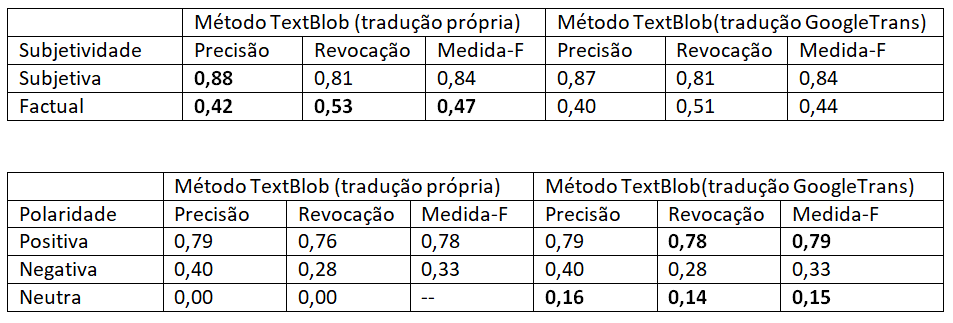

# **2.5 - Visão Temporal**

In [ ]:
portuguese_dataset['weekday'] = 'NaN'
for i in range(TAM_DATASET):
  dataPublicacao = datetime.strptime(portuguese_dataset['publicationDate'][i], '%d/%m/%Y')
  portuguese_dataset['weekday'][i] = str(dataPublicacao.weekday()) + " - " + dataPublicacao.strftime('%A')

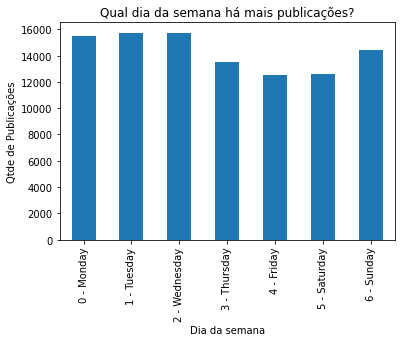

In [ ]:
portuguese_dataset.groupby('weekday').weekday.count().plot(kind="bar", title='Qual dia da semana há mais publicações?', xlabel='Dia da semana',ylabel='Qtde de Publicações')

# **2.6 - Visão Geográfica**

In [ ]:
portuguese_dataset['itemReviewed'][0]

{'address': {'addressLocality': '',
  'addressRegion': 'Alagoas',
  'country': 'Brasil',
  'postalCode': '57030-170',
  'streetAddress': 'Avenida Doutor Antônio Gouveia'},
 'averageRating': '4.5',
 'email': 'contato@imperadordoscamaroes.com.br',
 'name': 'Imperador dos Camarões',
 'phoneNumber': '+55 82 3231-4134',
 'website': 'http://www.imperadordoscamaroes.com.br'}

In [ ]:
portuguese_dataset['estado'] = 'NaN'
portuguese_dataset['CEP'] = 'NaN'
for i in range(TAM_DATASET):
  dados = portuguese_dataset['itemReviewed'][i]

  dataF = pd.DataFrame(dados)
  portuguese_dataset['estado'][i] = dataF['address'][1]
  portuguese_dataset['CEP'][i] = dataF['address'][3]


In [ ]:
portuguese_dataset['estado'].value_counts()

Estado de São Paulo         17455
Estado do Rio de Janeiro    10583
Rio Grande do Norte          7075
Ceará                        6206
Bahia                        6030
Pernambuco                   5986
Rio Grande do Sul            5814
Minas Gerais                 5476
Alagoas                      4526
Paraíba                      4440
Goiás                        3666
Distrito Federal             3547
Sergipe                      2616
Pará                         2414
Maranhão                     2097
Paraná                       2017
Mato Grosso do Sul           2004
Mato Grosso                  1795
Rio Amazonas                 1506
Espírito Santo               1189
Piauí                        1022
Rondônia                      702
Tocantins                     539
Acre                          429
Amapá                         422
Roraima                       368
Santa Catarina                 76
Name: estado, dtype: int64

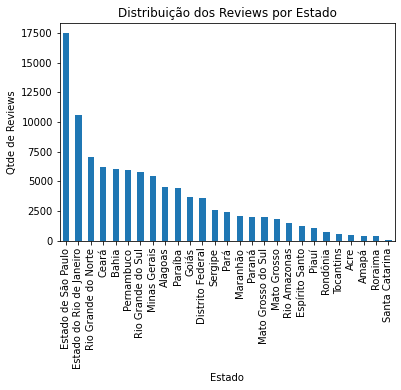

In [ ]:
portuguese_dataset['estado'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Distribuição dos Reviews por Estado', xlabel='Estado',ylabel='Qtde de Reviews')

**Hipóteses para essa distribuição:**

Acreditamos que essa distribuição está relacioanada a quantidade de restaurantes existentes no estado (quanto mais restaurantes, maior a possibilidade de alguém deixar um comentário) e, por consequência, quantidade de restaurantes está relacionada ao tamanho da população do estado/capital, ao fato de ser uma cidade mais ou menos turística.

No topo da distribuição temos: São Paulo e Rio de Janeiro. São Paulo tem a maior população do Brasil, talvez um dos maiores centros econômicos da América do Sul. E Rio de Janeiro é a cidade mais turística do Brasil.

Os restarantes localizados em Santa Catarina tem a menor quantidade de comentários, possivelmente porque a Capital Florianópolis é uma capital pequena com somente 500 mil habitantes. 


**Os usuários de estados diferentes são
mais ou menos rigorosos na avaliação dos restaurantes?**

In [ ]:
grouped = portuguese_dataset[['ratingValue']].groupby(portuguese_dataset['estado'])
grouped.mean().sort_values(by='ratingValue',ascending=False)

,ratingValue
estado,
Ceará,4.492749
Rio Grande do Norte,4.416113
Paraná,4.400595
Alagoas,4.374503
Mato Grosso do Sul,4.340319
Rio Amazonas,4.297477
Paraíba,4.296171
Maranhão,4.294230
Pará,4.293289


In [ ]:
def get_endereco(i):
  dados = portuguese_dataset['itemReviewed'][i]
  dataF = pd.DataFrame(dados)
  return dataF['address'][4] + " - " + dataF['address'][1]

listaEnderecos = []
listaLatitude = []
listaLongitude = []

df = pd.DataFrame({'address':[],'latitude':[], 'longitude':[]})

geolocator = Nominatim(user_agent="analise_sent_app") 

for i in (range(TAM_DATASET)):
  if portuguese_dataset['estado'][i] == 'Santa Catarina':  
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    endereco = get_endereco(i)
      
    if (endereco != ""):
      location = geocode(endereco)

      if hasattr(location, 'longitude') and hasattr(location, 'latitude'):
        listaEnderecos.append(endereco)
        listaLatitude.append(location.latitude)
        listaLongitude.append(location.longitude)

df.address = listaEnderecos
df.latitude = listaLatitude
df.longitude = listaLongitude
df

,address,latitude,longitude
0,Rua Adolfo Melo 82 - Santa Catarina,-27.593368,-48.551818
1,Rua Lauro Linhares 624 - Santa Catarina,-27.586795,-48.524600
2,Avenida Madre Benvenuta 1168 - Santa Catarina,-27.590316,-48.509964
3,Rua Professor Bento Aguido Vieira 20 Trindade ...,-27.588742,-48.520829
4,Avenida Afonso Delambert Neto 103 Lagoa da Con...,-27.601453,-48.472342
5,"Avenida Pequeno Príncipe, 2676 - Santa Catarina",-27.670660,-48.505288
6,Rua Professor Bento Aguido Vieira 20 Trindade ...,-27.588742,-48.520829
7,"Sc-403,3104 - Santa Catarina",-27.000186,-51.417184
8,Rua Professor Bento Aguido Vieira 20 Trindade ...,-27.588742,-48.520829
9,"Avenida das Raias, 1760 - Santa Catarina",-27.442152,-48.501246


In [ ]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

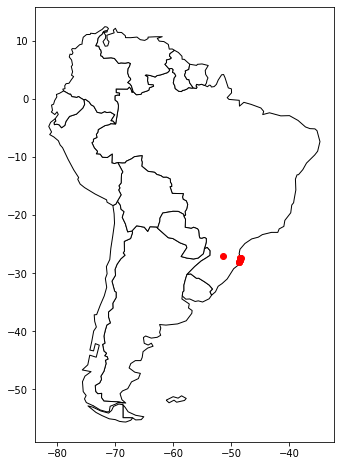

In [ ]:
# Restringindo a América do Sul
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# Plotando ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.rcParams['figure.figsize'] = (8,8)
plt.show()